In [1]:
import numpy as np

In [2]:
np.arange(0,1500)

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [3]:
time=np.arange(0,1500)

In [4]:
time.shape

(1500,)

In [5]:
#parameter is radian
np.sin(time*0.01)

array([0.        , 0.00999983, 0.01999867, ..., 0.67278245, 0.66535053,
       0.65785208])

In [6]:
import matplotlib.pyplot as plt

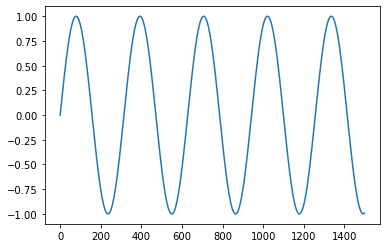

In [7]:
plt.plot(np.sin(time*0.02))

In [8]:
#adding noise
y_with_noise=np.sin(time*0.02)+np.random.uniform(low=-1,high=1,size=(1500,))

In [9]:
y_with_noise

array([-0.88879445,  0.17329129,  0.83809419, ..., -0.47951506,
       -1.00265121, -0.45334949])

In [10]:
ytarget=np.sin(time*0.02)

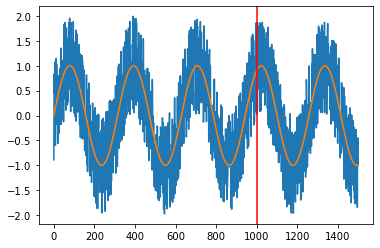

In [11]:
plt.plot(y_with_noise)
plt.plot(ytarget)
#for vertical line wrt to axis
plt.axvline(1000,c="r")

In [12]:
ytarget.shape

(1500,)

In [13]:
y_with_noise.shape

(1500,)

In [82]:
#converted to 2D data
y_with_noise_final=np.reshape(y_with_noise,(-1,1))
y_with_noise_final.shape

(1500, 1)

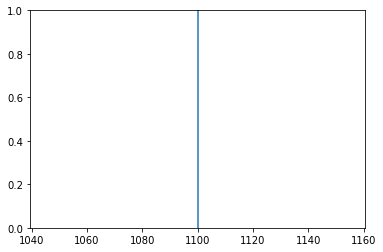

In [76]:
plt.axvline(1100)

In [80]:
#train is training data
train=y_with_noise_final[:1000]
train.shape

(1000, 1)

In [81]:
test=y_with_noise_final[1000:]
test.shape

(500, 1)

In [83]:
def createDS(data,step):
    x,y=[],[]
    for i in range(len(data)-step):
        x.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(x),np.array(y)    

In [84]:
#created x and y for training
trainX,trainY=createDS(train,10)

In [85]:
print(len(trainX),len(trainY))

990 990


In [86]:
testX,testY=createDS(test,10)

In [87]:
#converting list to numpy array
trainX=np.array(trainX)
trainY=np.array(trainY)

In [88]:
trainX.shape

(990, 10, 1)

In [89]:
trainY.shape

(990, 1)

In [90]:
train.shape

(1000, 1)

In [91]:
trainY[0]

array([0.96391195])

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
#normalizing the data b/w 0 and 1
normalizer=MinMaxScaler(feature_range=(0,1))

In [28]:
xfinal=normalizer.fit_transform(trainX)

In [29]:
#to convert back normalized data to original value
normalizer.inverse_transform(xfinal)

array([[-0.88879445,  0.17329129,  0.83809419, ...,  0.0336977 ,
        -0.59752795,  0.24118709],
       [ 0.17329129,  0.83809419,  0.55268575, ..., -0.59752795,
         0.24118709,  0.96391195],
       [ 0.83809419,  0.55268575,  0.43179055, ...,  0.24118709,
         0.96391195,  0.28349585],
       ...,
       [ 0.98754024, -0.14358976,  0.12790059, ...,  0.96151427,
         1.85693903,  0.30073149],
       [-0.14358976,  0.12790059,  0.52982512, ...,  1.85693903,
         0.30073149,  1.19037869],
       [ 0.12790059,  0.52982512,  0.07182774, ...,  0.30073149,
         1.19037869,  0.15049931]])

In [30]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

In [111]:
model=Sequential()

In [112]:
model.add(SimpleRNN(units=1,activation="tanh"))

In [113]:
model.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn_5',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}}]}

In [114]:
model.add(Dense(units=1,activation="linear"))

In [115]:
model.compile(loss="mean_squared_error",optimizer="",metrics=['accuracy'])

In [116]:
model.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn_5',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'dtype': 'flo

In [117]:
model.fit(trainX,trainY,epochs=100,validation_data=(testX,testY))

Epoch 1/100
31/31 [==============================] - 0s 12ms/step - loss: 4.6945 - accuracy: 0.0000e+00 - val_loss: 4.5953 - val_accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 4.5311 - accuracy: 0.0000e+00 - val_loss: 4.4433 - val_accuracy: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 4.3702 - accuracy: 0.0000e+00 - val_loss: 4.2894 - val_accuracy: 0.0000e+00
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 4.2111 - accuracy: 0.0000e+00 - val_loss: 4.1390 - val_accuracy: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 4.0543 - accuracy: 0.0000e+00 - val_loss: 3.9891 - val_accuracy: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 0s 7ms/step - loss: 3.8972 - accuracy: 0.0000e+00 - val_loss: 3.8399 - val_accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 7ms/step - loss: 3.7419 - accuracy: 0.0000e+00 - 

Epoch 56/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4543 - accuracy: 0.0000e+00 - val_loss: 0.4692 - val_accuracy: 0.0000e+00
Epoch 57/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.0000e+00 - val_loss: 0.4649 - val_accuracy: 0.0000e+00
Epoch 58/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4457 - accuracy: 0.0000e+00 - val_loss: 0.4608 - val_accuracy: 0.0000e+00
Epoch 59/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4418 - accuracy: 0.0000e+00 - val_loss: 0.4576 - val_accuracy: 0.0000e+00
Epoch 60/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.0000e+00 - val_loss: 0.4542 - val_accuracy: 0.0000e+00
Epoch 61/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4353 - accuracy: 0.0000e+00 - val_loss: 0.4514 - val_accuracy: 0.0000e+00
Epoch 62/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4328 - accuracy: 0.0000e

In [98]:
xfinal.shape

(990, 10)

In [42]:
#reshaping 2d to 3d . 1st parameter can be manual give no. of column
xfinal=xfinal.reshape(-1,10,1)

In [ ]:
model.fit(trainX,trainY)

In [39]:
trainX=trainX.reshape(-1,10,1)

In [99]:
trainX.shape

(990, 10, 1)

In [58]:
type(testX)
testX=np.array(testX)
testY=np.array(testY)


In [118]:
loss=model.history.history['loss']

In [ ]:
#normalising testX
testX=normalizer.fit_transform(testX)

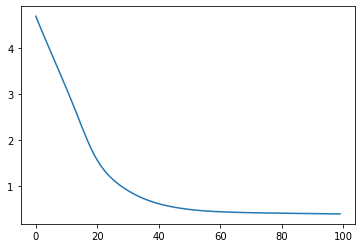

In [119]:
plt.plot(loss)

In [ ]:
train_pred=normalizer.inverse_transform(model.predict(trainX))

In [ ]:
test_pred=normalizer.inverse_transform(model.predict(testX))